<a href="https://colab.research.google.com/github/HariCharan21903/IPL-Score-Prediction-Using-Deep-learning/blob/main/Ipl_Score_prediction_using_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


In [5]:
ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [19]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=ipl)

https://docs.google.com/spreadsheets/d/1NEiiY7Po7Pk4zW-w3hX-kByOx--_m394ZSSg-qtSXCQ#gid=0


In [11]:
# prompt: Using dataframe ipl: team franchase

# Assuming 'team' refers to either 'bat_team' or 'bowl_team' and 'franchise' is synonymous with 'team' in this context.

# Display unique teams (franchises) that batted
print("Unique batting teams (franchises):")
print(ipl['bat_team'].unique())

# Display unique teams (franchises) that bowled
print("\nUnique bowling teams (franchises):")
print(ipl['bowl_team'].unique())


Unique batting teams (franchises):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']

Unique bowling teams (franchises):
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [9]:
# prompt: Using dataframe ipl: allrounders

# Find all-rounders by considering players who have scored more than 100 runs and taken more than 5 wickets
all_rounders = ipl[(ipl['runs'] > 100) & (ipl['wickets'] > 5)]

# Display the all-rounders
all_rounders


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
344,3,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,SK Warne,B Geeves,104,7,15.5,45,2,10,8,129
345,3,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,SK Warne,B Geeves,106,7,15.6,41,2,12,8,129
346,3,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,D Salunkhe,DL Vettori,107,7,16.1,38,2,12,9,129
347,3,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,SK Warne,DL Vettori,107,7,16.2,37,2,12,9,129
348,3,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,SK Warne,DL Vettori,108,7,16.3,38,2,13,9,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [8]:
# prompt: Using dataframe ipl: bowlers

# Assuming you want to see the unique bowlers in the dataset
ipl['bowler'].unique()


array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'B Lee', 'S Sreesanth', 'JR Hopes', 'IK Pathan',
       'K Goel', 'PP Chawla', 'WA Mota', 'GD McGrath', 'B Geeves',
       'MF Maharoof', 'R Bhatia', 'DL Vettori', 'R Vinay Kumar',
       'B Akhil', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'MM Patel', 'SR Watson',
       'SK Trivedi', 'SK Warne', 'D Salunkhe', 'Pankaj Singh',
       'YK Pathan', 'Mohammad Asif', 'VY Mahesh', 'SM Pollock', 'A Nehra',
       'DS Kulkarni', 'Harbhajan Singh', 'DJ Bravo', 'VS Yeligati',
       'AM Nayar', 'MA Khote', 'Sohail Tanvir', 'JDP Oram', 'MS Gony',
       'P Amarnath', 'M Muralitharan', 'Joginder Sharma', 'RP Singh',
       'DNT Zoysa', 'SB Bangar', 'Shahid Afridi', 'PP Ojha',
       'D Kalyankrishna', 'VRV Singh', 'Yuvraj Singh', 'DW Steyn',
       'CRD Fernando', 'ST Jayasuriya', 'V Kohli', 'Gagandeep Singh',
       'Umar Gul', 'SC Ganguly', 'LR Shukla', 'PJ Sangwan

In [7]:
# prompt: Using dataframe ipl: batsmen

# Group the data by batsman and calculate the total runs scored by each batsman.
batsman_runs = ipl.groupby('batsman')['runs'].sum()

# Sort the batsmen by the total runs in descending order to find the top batsmen.
top_batsmen = batsman_runs.sort_values(ascending=False)

# Display the top batsmen.
top_batsmen


,runs
batsman,
MS Dhoni,179014
SK Raina,144168
RG Sharma,141210
V Kohli,130757
AB de Villiers,118182
...,...
DS Lehmann,93
T Henderson,62
S Chanderpaul,42


In [6]:
# prompt: Using dataframe ipl: wins

# Group the data by the batting team and count the number of matches won.
wins = ipl.groupby('bat_team')['mid'].nunique()

# Display the number of wins for each batting team.
print(wins)

bat_team
Chennai Super Kings            74
Deccan Chargers                43
Delhi Daredevils               58
Gujarat Lions                  14
Kings XI Punjab                75
Kochi Tuskers Kerala            7
Kolkata Knight Riders          66
Mumbai Indians                 82
Pune Warriors                  20
Rajasthan Royals               54
Rising Pune Supergiant          8
Rising Pune Supergiants         6
Royal Challengers Bangalore    68
Sunrisers Hyderabad            42
Name: mid, dtype: int64


In [12]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=ipl)

https://docs.google.com/spreadsheets/d/1eCW3FoDB5qeBf66JqFv_bCAQZDnTKbMRXqXUyZ_SAUo#gid=0


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [15]:
X = df.drop(['total'], axis =1)
y = df['total']

In [16]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [17]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Replace 'Unknown' values with NaN
X_train.replace('Unknown', np.nan, inplace=True)

# Impute NaN values using a suitable strategy (e.g., SimpleImputer)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Replace with your desired strategy
X_train = imputer.fit_transform(X_train)

# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

<ipython-input-22-fcf729e63fc4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train.replace('Unknown', np.nan, inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['team_captain']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [23]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


In [26]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace 'Unknown' values with NaN in both X_train and X_test
X_train.replace('Unknown', np.nan, inplace=True)
X_test.replace('Unknown', np.nan, inplace=True)

# Impute NaN values using a suitable strategy (e.g., SimpleImputer)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Replace with your desired strategy
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use transform for X_test

# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Scale X_test using the same scaler

# Define the neural network model
# ... (rest of the code remains the same)

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

<ipython-input-26-f1932e39912b>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train.replace('Unknown', np.nan, inplace=True)
<ipython-input-26-f1932e39912b>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.replace('Unknown', np.nan, inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['team_captain']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 56.3914 - val_loss: 22.0699
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.4627 - val_loss: 21.9920
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2676 - val_loss: 22.2268
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.2034 - val_loss: 21.9120
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.3387 - val_loss: 22.0381
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.1582 - val_loss: 22.1740
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2053 - val_loss: 21.9396
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2561 - val_loss: 21.8591
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1986 - val_loss: 21.9444
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.2468 - val_loss: 21.9689
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1110 - val_loss: 21.8848
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

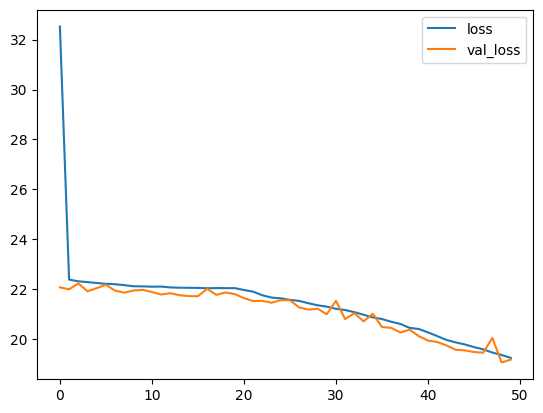

In [27]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [28]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


19.665416717529297

In [29]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [30]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()